In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Download Folder
from google.colab import files

In [2]:
#read in data using pandas
train_df = pd.read_csv('drive/MyDrive/Projects/ITR_Project/final_handData.csv')
#check data has been read in properly
print(train_df)

      0         1         2             3         4         5         6  \
0     0  0.404026  0.621056 -6.600000e-07  0.332887  0.506639 -0.005147   
1     0  0.403448  0.616114 -6.510000e-07  0.336590  0.505035 -0.005890   
2     0  0.418473  0.618932 -6.490000e-07  0.360518  0.497287 -0.007421   
3     0  0.489930  0.658153 -6.110000e-07  0.439280  0.523737 -0.012807   
4     0  0.542151  0.775465 -6.220000e-07  0.522526  0.627470 -0.009311   
...  ..       ...       ...           ...       ...       ...       ...   
4995  4  0.668271  0.674607  2.450000e-07  0.619059  0.660857 -0.009120   
4996  4  0.765949  0.683521  2.660000e-07  0.714221  0.660657 -0.003121   
4997  4  0.815805  0.693446  2.170000e-07  0.761634  0.693313 -0.004330   
4998  4  0.825029  0.696767  2.550000e-07  0.770418  0.695777 -0.005772   
4999  4  0.817318  0.694929  1.700000e-07  0.766149  0.701938  0.002326   

             7         8         9  ...        56        57        58  \
0     0.312980  0.375284 -

In [3]:
#create a dataframe with all training data except the target column
X = train_df.drop(columns=["0"])
X = X.loc[:, ~X.columns.str.contains('^Unnamed')]

#check that the target variable has been removed
print(X)

             1         2             3         4         5         6  \
0     0.404026  0.621056 -6.600000e-07  0.332887  0.506639 -0.005147   
1     0.403448  0.616114 -6.510000e-07  0.336590  0.505035 -0.005890   
2     0.418473  0.618932 -6.490000e-07  0.360518  0.497287 -0.007421   
3     0.489930  0.658153 -6.110000e-07  0.439280  0.523737 -0.012807   
4     0.542151  0.775465 -6.220000e-07  0.522526  0.627470 -0.009311   
...        ...       ...           ...       ...       ...       ...   
4995  0.668271  0.674607  2.450000e-07  0.619059  0.660857 -0.009120   
4996  0.765949  0.683521  2.660000e-07  0.714221  0.660657 -0.003121   
4997  0.815805  0.693446  2.170000e-07  0.761634  0.693313 -0.004330   
4998  0.825029  0.696767  2.550000e-07  0.770418  0.695777 -0.005772   
4999  0.817318  0.694929  1.700000e-07  0.766149  0.701938  0.002326   

             7         8         9        10  ...        55        56  \
0     0.312980  0.375284 -0.008243  0.354004  ... -0.007065  0

In [4]:
X.shape

(5000, 63)

In [5]:
data_y = train_df["0"]
data_y[0:5]
data_y.shape

(5000,)

In [6]:
X.isnull().sum()

1     0
2     0
3     0
4     0
5     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 63, dtype: int64

In [7]:
def MultiLabelMaker(y, No_labels):
    train_Y = []
    for i in y:
        labels = np.array([0]*No_labels)
        labels[i] = 1
        train_Y.append(labels)
    return np.array(train_Y)


In [8]:
Y = MultiLabelMaker(data_y, 5)
print(Y[4])
    

[1 0 0 0 0]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [10]:
def model(X):
    #create model
    model = Sequential()

    #get number of columns in training data
    n_cols = X.shape[1]

    #add layers to model
    model.add(Flatten(input_shape=(n_cols,)))
    model.add(Dense(80, activation='relu' ))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    return model


In [11]:
model_2 = model(X_train)

In [12]:
#compile model using accuracy to measure model performance
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#train model
model_2.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
113/113 [==============================] - 2s 6ms/step - loss: 1.5580 - accuracy: 0.2803 - val_loss: 1.4705 - val_accuracy: 0.3322
Epoch 2/50
113/113 [==============================] - 14s 129ms/step - loss: 1.3346 - accuracy: 0.4369 - val_loss: 1.0986 - val_accuracy: 0.5744
Epoch 3/50
113/113 [==============================] - 0s 3ms/step - loss: 0.9447 - accuracy: 0.6350 - val_loss: 0.8826 - val_accuracy: 0.6278
Epoch 4/50
113/113 [==============================] - 3s 25ms/step - loss: 0.7620 - accuracy: 0.7139 - val_loss: 0.6881 - val_accuracy: 0.7389
Epoch 5/50
113/113 [==============================] - 2s 17ms/step - loss: 0.6470 - accuracy: 0.7631 - val_loss: 0.5435 - val_accuracy: 0.8167
Epoch 6/50
113/113 [==============================] - 3s 22ms/step - loss: 0.5649 - accuracy: 0.7903 - val_loss: 0.5063 - val_accuracy: 0.8256
Epoch 7/50
113/113 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.8403 - val_loss: 0.5814 - val_accuracy: 0.7733


In [14]:
prediction = model_2.predict(X_test)

16/16 [==============================] - 0s 16ms/step


In [15]:
model_2.save("handPose")

In [16]:
!zip -r /content/handPose10.zip /content/handPose
files.download("/content/handPose10.zip")

  adding: content/handPose/ (stored 0%)
  adding: content/handPose/keras_metadata.pb (deflated 90%)
  adding: content/handPose/variables/ (stored 0%)
  adding: content/handPose/variables/variables.index (deflated 63%)
  adding: content/handPose/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: content/handPose/saved_model.pb (deflated 88%)
  adding: content/handPose/assets/ (stored 0%)
  adding: content/handPose/fingerprint.pb (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model loading

In [17]:
# Load the gesture recognizer model
# model = load_model('drive/MyDrive/Projects/ITR_Project/handPose2')
model = load_model('handPose')

# Load class names
f = open('gesture2.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

['start', 'thumbs_up', 'Arrow', 'three_finger', 'stop']


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 63)                0         
                                                                 
 dense (Dense)               (None, 80)                5120      
                                                                 
 dense_1 (Dense)             (None, 96)                7776      
                                                                 
 dense_2 (Dense)             (None, 128)               12416     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 5)                 8

In [19]:
prediction = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [20]:
y_predict = []
for i in prediction:
    y_predict.append(np.argmax(i))
y_predict = np.array(y_predict)

In [21]:
y = []
for i in y_test:
    y.append(np.where(i == 1)[0][0])
y = np.array(y)

In [22]:
#compute the confusion matrix.
cm = confusion_matrix(y,y_predict)

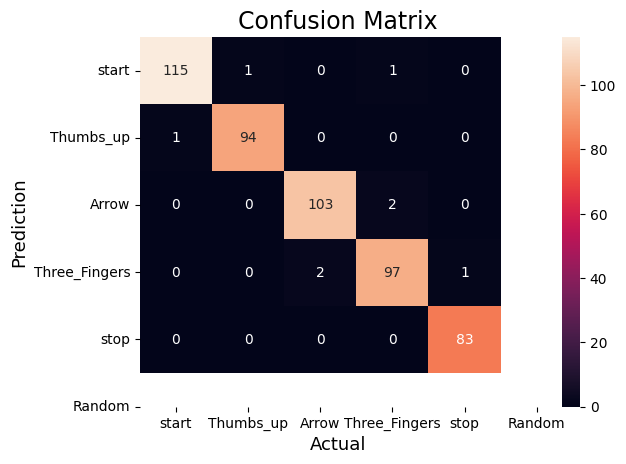

In [23]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['start','Thumbs_up','Arrow','Three_Fingers','stop','Random'],
            yticklabels=['start','Thumbs_up','Arrow','Three_Fingers','stop','Random'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()